   # Kunskapskontroll 2
   
   Använd maskininlärning för att modellera MNIST datan. Du skall utvärdera minst två olika modeller i 
ditt arbete och göra ett komplett ML-flöde, från början där du laddar in data till slut där du
utvärderar den bäst valda modellen på din test data.

## Importera paket

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)

In [2]:
import sklearn
sklearn.__version__

'1.3.0'

# Importera och organisera data

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
print(mnist.DESCR)

C:\Users\Matil\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
#Definiera X och y i datasetet.

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [5]:
X.shape

(70000, 784)

In [6]:
#Dela upp testdata och träning/valideringsdata.

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)

In [7]:
#Dela upp tränings och valideringsdata.

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

## Modelling

In [8]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_clf.fit(X_train, y_train)

random_forest_clf.score(X_val, y_val)

0.9692

In [9]:
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

extra_trees_clf.fit(X_train, y_train)

extra_trees_clf.score(X_val, y_val)

0.9715

In [20]:
svc_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

svc_clf.fit(X_train, y_train)

svc_clf.score(X_val, y_val)

C:\Users\Matil\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.859

# Evaluate your best model on the test set. 

In [11]:
y_pred = extra_trees_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9691

In [12]:
y_pred = random_forest_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9645

In [21]:
y_pred = svc_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8566

0


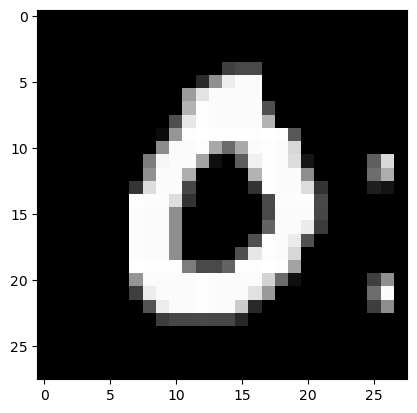

In [13]:
print(y_train[3])
plt.imshow(X_train[3].reshape(28, 28), cmap='gray')


In [14]:
import joblib
joblib.dump(extra_trees_clf, 'Extra_trees.pkl')

['Extra_trees.pkl']

In [15]:
joblib.dump(random_forest_clf, 'Random_forest.pkl')

['Random_forest.pkl']

In [22]:
joblib.dump(svc_clf, 'SVC.pkl')

['SVC.pkl']

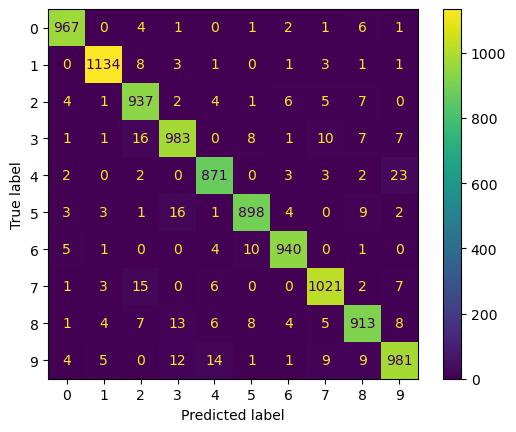

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

plt.show()

# Evaluera

Extra trees är den bästa modellen.